In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [13]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [14]:
print(datetime. now())
lambda4 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(lambda4)):
    print(lambda4[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(1, 1, 1, 1, 1, lambda4[i], 0.1, 0.1, 0.05, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-17 17:23:13.498103
0
0
0
2023-08-17 17:23:13.501593


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-17 17:23:25.945629
2
2023-08-17 17:23:39.095801
3
2023-08-17 17:23:51.979565
4
2023-08-17 17:24:05.814450
5
2023-08-17 17:24:17.795035
6
2023-08-17 17:24:29.334985
7
2023-08-17 17:24:41.898168
8
2023-08-17 17:24:53.811288
9
2023-08-17 17:25:06.452587
[0.77080933]
[0.2278015]
[0.99948346]
[0.]
[0.66608277]
[0.22911762]
[0.77194879]
[0.00051654]
[0.]
[0.33380963]
[2.3068601]
[7.71619761]
[0.01012518]
[0.]
[10.03318289]
0.2
1
0
2023-08-17 17:25:17.710805
1
2023-08-17 17:25:28.906842
2
2023-08-17 17:25:40.193629
3
2023-08-17 17:25:51.259815
4
2023-08-17 17:26:02.552722
5
2023-08-17 17:26:14.382151
6
2023-08-17 17:26:25.621997
7
2023-08-17 17:26:36.690604
8
2023-08-17 17:26:47.736906
9
2023-08-17 17:26:58.954289
[0.77080933 0.77751516]
[0.2278015  0.42303162]
[0.99948346 0.9976534 ]
[0.         0.99814532]
[0.66608277 0.74938627]
[0.22911762 0.22240801]
[0.77194879 0.57679835]
[0.00051654 0.0023466 ]
[0.         0.00185468]
[0.33380963 0.2505366 ]
[2.3068601  2.21666806]
[7.716197

1
2023-08-17 17:40:41.107886
2
2023-08-17 17:41:00.063845
3
2023-08-17 17:41:18.517231
4
2023-08-17 17:41:37.182018
5
2023-08-17 17:41:55.954013
6
2023-08-17 17:42:14.977945
7
2023-08-17 17:42:33.895998
8
2023-08-17 17:42:52.702997
9
2023-08-17 17:43:11.388833
[0.77080933 0.77751516 0.79331635 0.82645728 0.87526601 0.92567682
 0.96146981 0.98494974 0.99515628]
[0.2278015  0.42303162 0.60031603 0.7450944  0.85220779 0.92477532
 0.96556731 0.98717681 0.9961821 ]
[0.99948346 0.9976534  0.99267407 0.9808711  0.95768424 0.92406554
 0.8876044  0.85930976 0.84351532]
[0.         0.99814532 0.99405097 0.98421218 0.96271839 0.92419379
 0.86725361 0.79485957 0.71861127]
[0.66608277 0.74938627 0.81909254 0.87310734 0.90926903 0.924669
 0.91795424 0.89641904 0.86621983]
[0.22911762 0.22240801 0.20660723 0.17350966 0.12472728 0.07429303
 0.03852686 0.01505026 0.00484372]
[0.77194879 0.57679835 0.39953712 0.25481244 0.14775236 0.07515426
 0.03439943 0.01282319 0.0038179 ]
[0.00051654 0.0023466  0.00

1
2023-08-17 17:57:54.341615
2
2023-08-17 17:58:31.675843
3
2023-08-17 17:59:09.713428
4
2023-08-17 17:59:50.453407
5
2023-08-17 18:00:30.498517
6
2023-08-17 18:01:07.576506
7
2023-08-17 18:01:43.892784
8
2023-08-17 18:02:20.817436
9
2023-08-17 18:02:57.945069
[0.77080933 0.77751516 0.79331635 0.82645728 0.87526601 0.92567682
 0.96146981 0.98494974 0.99515628 0.99871904 0.99964772 0.99992321
 0.99998992]
[0.2278015  0.42303162 0.60031603 0.7450944  0.85220779 0.92477532
 0.96556731 0.98717681 0.9961821  0.9990492  0.99974004 0.99996999
 0.99998999]
[0.99948346 0.9976534  0.99267407 0.9808711  0.95768424 0.92406554
 0.8876044  0.85930976 0.84351532 0.83494851 0.83411716 0.83171574
 0.83318122]
[0.         0.99814532 0.99405097 0.98421218 0.96271839 0.92419379
 0.86725361 0.79485957 0.71861127 0.64437309 0.58349759 0.53046573
 0.48573665]
[0.66608277 0.74938627 0.81909254 0.87310734 0.90926903 0.924669
 0.91795424 0.89641904 0.86621983 0.83172214 0.80018554 0.76895606
 0.74042612]
[2.291

1
2023-08-17 18:19:41.676726
2
2023-08-17 18:20:37.304249
3
2023-08-17 18:21:33.777479
4
2023-08-17 18:22:29.238841
5
2023-08-17 18:23:24.576718
6
2023-08-17 18:24:21.174072
7
2023-08-17 18:25:16.550135
8
2023-08-17 18:26:12.866695
9
2023-08-17 18:27:19.439529
[0.77080933 0.77751516 0.79331635 0.82645728 0.87526601 0.92567682
 0.96146981 0.98494974 0.99515628 0.99871904 0.99964772 0.99992321
 0.99998992 0.99999009 0.99999668 0.99999668]
[0.2278015  0.42303162 0.60031603 0.7450944  0.85220779 0.92477532
 0.96556731 0.98717681 0.9961821  0.9990492  0.99974004 0.99996999
 0.99998999 1.         1.         1.        ]
[0.99948346 0.9976534  0.99267407 0.9808711  0.95768424 0.92406554
 0.8876044  0.85930976 0.84351532 0.83494851 0.83411716 0.83171574
 0.83318122 0.83248651 0.83161572 0.8323925 ]
[0.         0.99814532 0.99405097 0.98421218 0.96271839 0.92419379
 0.86725361 0.79485957 0.71861127 0.64437309 0.58349759 0.53046573
 0.48573665 0.4495577  0.41860296 0.38995605]
[0.66608277 0.74938

In [10]:
# Results 

lambda4 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]

CE_Match_rates = [0.77080933, 0.77751516, 0.79331635, 0.82645728, 0.87526601, 0.92567682, 0.96146981, 0.98494974, 0.99515628, 0.99871904, 0.99964772, 0.99992321, 0.99998992, 0.99999009, 0.99999668, 0.99999668]

EE_Match_rates = [0.2278015, 0.42303162, 0.60031603, 0.7450944, 0.85220779, 0.92477532, 0.96556731, 0.98717681, 0.9961821, 0.9990492, 0.99974004, 0.99996999, 0.99998999, 1.0, 1.0, 1.0]

JC_Match_rates = [0.99948346, 0.9976534, 0.99267407, 0.9808711, 0.95768424, 0.92406554, 0.8876044, 0.85930976, 0.84351532, 0.83494851, 0.83411716, 0.83171574, 0.83318122, 0.83248651, 0.83161572, 0.8323925]

JE_Match_rates = [0.0, 0.99814532, 0.99405097, 0.98421218, 0.96271839, 0.92419379, 0.86725361, 0.79485957, 0.71861127, 0.64437309, 0.58349759, 0.53046573, 0.48573665, 0.4495577, 0.41860296, 0.38995605]

Total_Match_rates = [0.66608277, 0.74938627, 0.81909254, 0.87310734, 0.90926903, 0.924669, 0.91795424, 0.89641904, 0.86621983, 0.83172214, 0.80018554, 0.76895606, 0.74042612, 0.7147072, 0.69070573, 0.66714065]

CE_Abandon_rates = [0.229117623, 0.222408007, 0.20660723, 0.173509665, 0.124727279, 0.0742930287, 0.0385268621, 0.0150502623, 0.00484372023, 0.00128096127, 0.00035227693, 0.0000767932148, 0.0000100806452, 0.00000990949329, 0.00000331553994, 0.00000332225914]

EE_Abandon_rates = [0.77194879, 0.576798355, 0.399537117, 0.254812438, 0.147752364, 0.0751542608, 0.0343994342, 0.0128231867, 0.00381789623, 0.000950796311, 0.000259961265, 0.0000300102891, 0.0000100108127, 0.0, 0.0, 0.0]

JC_Abandon_rates = [0.00051654, 0.0023466, 0.00732262, 0.01910235, 0.04227919, 0.0758944, 0.11235573, 0.14061714, 0.15638134, 0.16492513, 0.16575589, 0.16816796, 0.16667223, 0.16737705, 0.16826456, 0.16746031]

JE_Abandon_rates = [0.0, 0.00185468, 0.00594903, 0.01578221, 0.03724794, 0.0757599, 0.13267404, 0.20500202, 0.28116224, 0.35541573, 0.41622593, 0.4692059, 0.51393984, 0.5500587, 0.5810335, 0.6096202]

Total_Abandon_rates = [0.33380963, 0.2505366, 0.18084089, 0.12684926, 0.09070204, 0.07528428, 0.08200686, 0.10352033, 0.1336789, 0.16817224, 0.1996785, 0.23088261, 0.25940286, 0.28509049, 0.30909835, 0.33262307]

CE_Queue_length = [2.3068601, 2.21666806, 2.07101446, 1.74320383, 1.25197228, 0.743389465, 0.386270014, 0.151986975, 0.0485323768, 0.0134606045, 0.00405434119, 0.000772323823, 0.000134804324, 2.71337632e-05, 2.39000072e-05, 3.61063371e-05]

EE_Queue_length = [7.71619761, 5.77988177, 3.98740613, 2.55853755, 1.48047599, 0.747082791, 0.340410369, 0.125258303, 0.0387745067, 0.0107127105, 0.00276289348, 0.000513336365, 0.000135459748, 1.19441151e-05, 1.44791219e-05, 6.80176104e-06]

JC_Queue_length = [0.01012518, 0.04583054, 0.14525108, 0.38252151, 0.84902861, 1.51164749, 2.24787354, 2.8305639, 3.13190566, 3.31370378, 3.32812833, 3.36435605, 3.34132181, 3.34524431, 3.36704891, 3.34419429]

JE_Queue_length = [0.00000000e+00, 7.77929751e-03, 4.63218393e-02, 1.91304120e-01,5.93136461e-01, 1.51163601e+00, 3.18916472e+00, 5.73107379e+00,
                9.02159774e+00, 1.27756834e+01, 1.66001838e+01, 2.06579505e+01,
 2.46494473e+01, 2.85700232e+01, 3.24486224e+01, 3.65510988e+01]
Total_Queue_length = [10.03318289, 8.05015967, 6.24999351, 4.87556701, 4.17461333, 4.51375576, 6.16371865, 8.83888297, 12.24081028, 16.11356047, 19.93512932, 24.02359225, 27.99103932, 31.91530657, 35.81570967, 39.89533598]



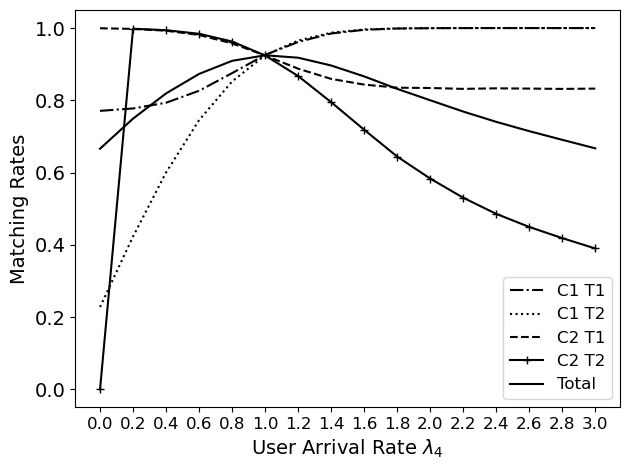

In [14]:
plt.xlabel(r'User Arrival Rate $\lambda_4$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(lambda4, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda4, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda4, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda4, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda4, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda4, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp22_Match_long.png')
plt.show()

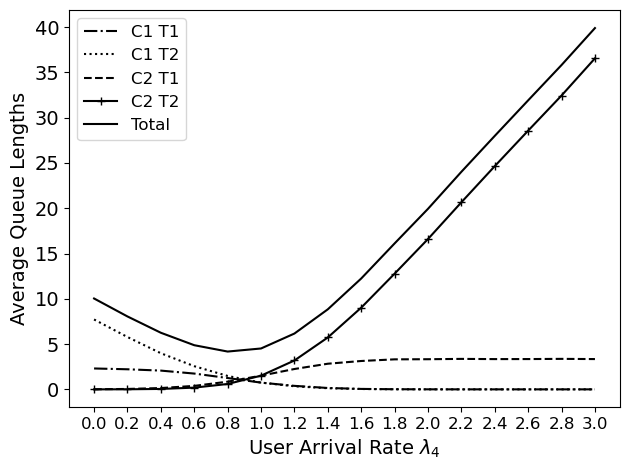

In [15]:
plt.xlabel(r'User Arrival Rate $\lambda_4$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(lambda4, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda4, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda4, JC_Queue_length,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda4, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda4, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda4, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp22_Queue_long.png')
plt.show()



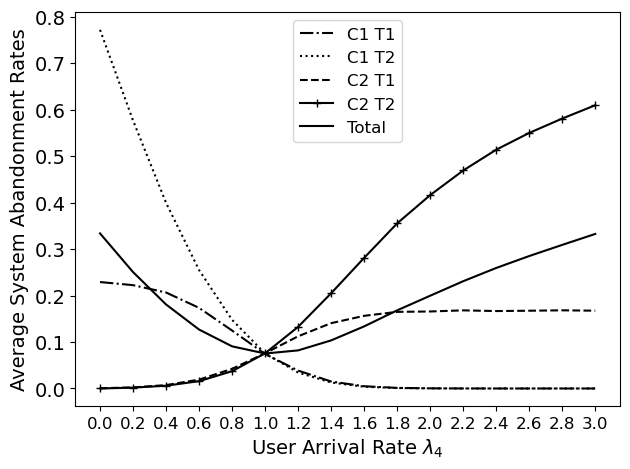

In [16]:
plt.xlabel(r'User Arrival Rate $\lambda_4$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(lambda4, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda4, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda4, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda4, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda4, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda4, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp22_Abandon_long.png')
plt.show()



